In [74]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

import axion_mass

params [  3.15908684e+01   1.43451525e+08   7.91124914e+00] 


[[  5.16146948e-04  -2.63799636e+04  -1.29170082e-04]
 [ -2.63799636e+04   1.93636841e+12   2.23557612e+04]
 [ -1.29170082e-04   2.23557612e+04   5.84619743e-04]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in power
  


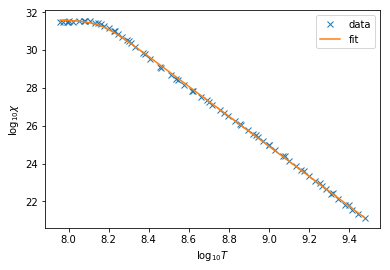

In [75]:
logT = np.log10(axion_mass.T_data)
logchi = np.log10(axion_mass.chi_data)
plt.plot(logT, logchi, "x", label="data")
def f(logT, log_chi0, T1, T2, p1, p2):
    T = 10**logT
    return log_chi0 - np.log10((1 + (T / T1)**p1 + (T / T2)**p2))
params, cov = opt.curve_fit(f, logT, logchi, p0=[30, 2e9, 8])
plt.plot(logT, f(logT, *params), label="fit")
print("params", params, "\n\n")
print(cov)
plt.xlabel(r"$\log_{10} T$")
plt.ylabel("$\log_{10} \chi$")
plt.legend()

In [76]:
def chi_fit(T):
    return 10**f(np.log10(T), *params)

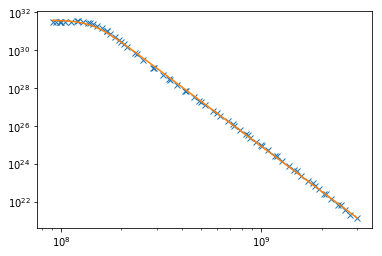

In [77]:
plt.loglog(axion_mass.T_data, axion_mass.chi_data, "x")
plt.loglog(axion_mass.T_data, chi_fit(axion_mass.T_data))